In [23]:
import pandas as pd
import numpy as np
import mglearn

これまではクラス分類の性能を精度(正確に分類されたサンプルの割合)で評価し、回帰性能を$R^{2}$で評価してきた。しかしこれはあるデータに対する教師あり学習のモデルを評価する方法の一つにすぎない。実際これらはあるアプリケーションによっては不適当な場合もある

# 2クラス分類における基準
## エラーの種類
2クラス分類の場合では、2つのクラスのを陽性と陰性と呼び、探し求めているものを陽性という。  
例をあげよう。ガンの早期発見を分類するタスクにおいて、テストが陰性であれば患者は健康であることを意味し、陽性であればガンであるらしいことになる。  
この場合に2つのエラー(間違い)が存在する
1. αエラー(第一種の過誤)：患者が陰性であるはずなのに、陽性と判断してしまうこと。**偽陽性＝false positive**と呼ぶ
2. βエラー(第二種の過誤)：患者が陽性であるはずなのに、陰性と判断してしまうこと。**偽陰性＝false nagative**と呼ぶ  

ガンの早期発見というタスクでは、偽陽性の間違いを犯すことより、偽陰性である間違いを犯すことを可能なかぎり避けるべきである。

## データの偏り
Webに置ける広告のクリック回数を例にとろう。
広告のクリックはほかのクリック回数より圧倒的に少ない。100回のページクリックにおいて広告のクリックは一回くらいだとしよう。モデルによって99%のクリックが予想されたとする。これは何を意味するだろうか？例えば、100回のページクリックですべて広告のクリックなしと判断すれば精度99%を達成できる。  
このようなクラスの分類で一方が圧倒的に多いデータは**偏ったデータセット(imbalanced dataset)**と呼ぶ。偏ったデータセットであっても、99%でクリックされないことを予測できるモデルは素晴らしいが、問題は常にクリックされないとするモデルと潜在的には良いモデルを区別できないことにある。

digitsデータセットから数字の9とそれ以外の数字に分割する。  
DummyClassifierで9以外を予測するだけのモデルを作る。こうすることで9を予測しなくても90%の精度がでるモデルを作ることができる

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

#digitsデータセットから9のみのターゲットを抜き出す
y = digits.target == 9

#答えは9しか存在しない
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [7]:
from sklearn.dummy import DummyClassifier 

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('Unique predicted lables: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted lables: [False]
Test score: 0.90


In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


精度でいえば、DecisionTreeClassifierは何も学習していなモデルより0.02だけ性能がいい。  
他の分類器でも検証してみよう

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.98


In [27]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('Test score: {:.2f}'.format(dummy.score(X_test, y_test)))

Test score: 0.83


LogisticRegressionで98%の精度がでるが、ランダムな出力をするだけのモデルでも80パーセントの精度がでることになる。  
偏ったデータセットの性能を定量化するための指標として精度はよい指標ではない。特に「頻度が高いものだけを返す」分類器やランダムな結果を返すだけの分類器よりも性能がよいと示す基準が欲しい。この基準を得るために混同行列を導入する。

In [22]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix: \n{}'.format(confusion))

Confusion matrix: 
[[401   2]
 [  8  39]]


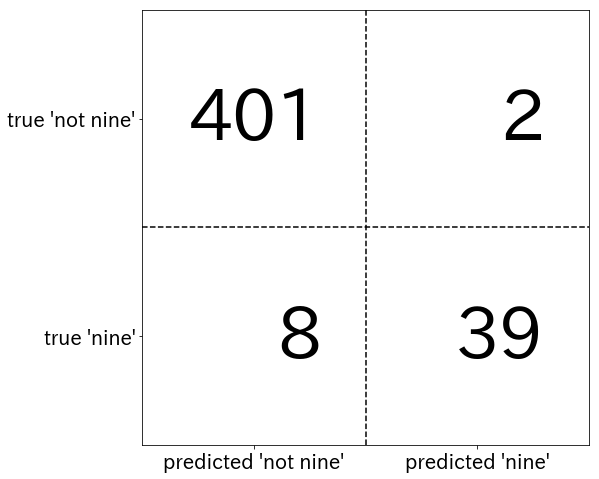

In [25]:
mglearn.plots.plot_confusion_matrix_illustration()

**混同行列の主対角成分(i,i)は正確に分類されたサンプルの個数を表す**。それ以外の要素は実際とはことなるクラスに分類されたサンプルの数を表す。

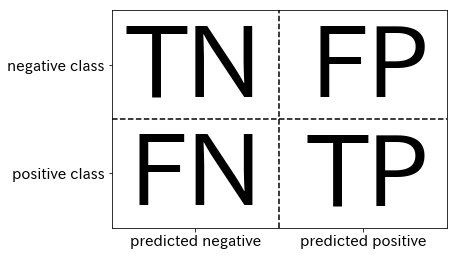

In [26]:
mglearn.plots.plot_binary_confusion_matrix()

- FP=False Positive=偽陽性
- FN=False Nagetive=偽陰性
  
この混同行列を使って各モデルの分類結果を見てみる

In [29]:
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))
print('\nDummy model:')
print(confusion_matrix(y_test, pred_dummy))
print('Test score: {:.2f}'.format(dummy.score(X_test, y_test)))
print('\nDicision tree:')
print(confusion_matrix(y_test, pred_tree))
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))
print('\nLogistic regression:')
print(confusion_matrix(y_test, pred_logreg))
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Most frequent class:
[[403   0]
 [ 47   0]]
Test score: 0.90

Dummy model:
[[361  42]
 [ 41   6]]
Test score: 0.84

Dicision tree:
[[390  13]
 [ 24  23]]
Test score: 0.92

Logistic regression:
[[401   2]
 [  8  39]]
Test score: 0.98


- 最も頻度が高いクラスだけを予測するモデルは常に一つのクラスの分類しているので、すぐにおかしいことに気づく
- ランダムに予測するモデルは真陽性の数がすくない。明らかに予測できていない
- 決定木のモデルは最も頻度が高いクラスを予測するだけのモデルと精度はあまり変わらなかったが、明らかに正しく分類できていることがわかる
- 決定木とロジスティック回帰を比べると、ロジスティック回帰の方が、正しく分類できている数が多いし、間違って分類している数も少ない。決定木よりはるかによいモデルであることがわかる

## 精度
正しく予測できた数(TP+TN)を全てのサンプルの個数で割ったものである
\begin{equation}
accurancy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

## 適合率(precision)
陽性であると予測されたものが実際に陽性であったかの指標
\begin{equation}
precision = \frac{TP}{TP+FP}
\end{equation}  
適合率は偽陽性の数を制限したい場合によく用いられる。例えば新薬の臨床実験には多大なコストがかかるので、製薬会社は確かに効果の薬であると確信がない限り臨床実験を行わない。つまり偽陽性＝本当は陰性なのに陽性とクラス分類される数をなるべく抑えて実際に効果がある結果を得たいわけだ

## 再現率(recall)
陰性であると予測されたものが実際に陰性であったかの指標
\begin{equation}
recall = \frac{TN}{TN+FN}
\end{equation}  
再現率は偽陰性の数を制限したい場合によく用いられる。例えば、ガンの早期発見タスクでは実際にガンであるのにガンを見逃すことは、ガンでないのにガンであると判定することよりもよっぽどたちが悪い。つまり偽陰性=本当は陽性なのに陰性と判定されてガンが見過ごされるのを防ぎたいわけだ

### 適合率と再現率のトレードオフ
適合率と再現率はトレードオフの関係にある。すべてのサンプルを陽性と判断すれば、偽陰性と真陰性もなくなるので簡単に再現率100%を得られる。しかしすべてのサンプルを陽性と判断すれば偽陽性が大量に発生して適合率が極端に低くなるだろう。また真であることを確信をもって言えるデータポイント一点についてだけ、陽性と判断して残りを陰性と判断するようなことをすれば、(予測したデータが本当に陽性なら)適合率は100%になるが再現率は低くなるだろう

## f値
適合率と再現率はどちらか一方だけを見ても全体像をつかめないので、これら2つの指標をまとめるｆスコア(f-measure)という指標がある。これは適合率と再現率の調和平均である。
\begin{equation}
F = 2 * \frac{precision * recall}{precision + recall}
\end{equation}

In [31]:
from sklearn.metrics import f1_score

print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('f1 score most dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score most tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score most logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score most dummy: 0.13
f1 score most tree: 0.55
f1 score most logistic regression: 0.89


/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- 「最も頻度の高いクラスで分類する」モデルは陽性と判定されるサンプルがないためエラーをエラーとなる
- ダミーと決定木の予測が峻別して定量的に評価できる  

ｆ値は偏ったデータセットで我々の直感に近い指標を与えてくれるが、デメリットとして精度と比較して解釈や説明が難しいことにある

In [34]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/ktr.w/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.90      0.90      0.90       403
       nine       0.12      0.13      0.13        47

avg / total       0.82      0.82      0.82       450



In [37]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



ランダムに分類するモデルともっとも性能のよいロジスティック回帰のレポートをみると、not nineの分類ではほとんど性能が同じであることがわかる(not nineが大量に含まれるわけだからこうなる)。しかし、少ないクラスであるnineを正しく予測できているかに関してはロジスティック回帰の方が断然性能が良い。結果として全体ではロジスティック回帰が一番いい性能を持っていると言えるわけだ。